#MNIST-Handwritten_digit_classification

**This is a multiclass(more specifically 10 class) classifiaction problem.**

The MNIST database of handwritten digits, available from this [page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST.We can use the above dataset or use it from keras dataset(without downloading !).I have used the latter approach.

In [ ]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import clear_output

##Preparing the data to be fed into our model



*   We have 10 classes( 0 to 9)
*   This is a grayscale image of 28*28 pixels



In [ ]:
number_classes=10
input_shape_of_image=(28,28,1)

###Splitting the dataset into train and test and getting its shape !

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#Let's visulise one of the image using matplotlib library

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


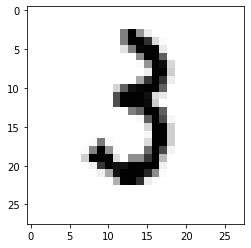

In [ ]:
%matplotlib inline
image_index = 1234
print(y_train[image_index])
plt.imshow(np.squeeze(x_train[image_index]), cmap='Greys')

###Feature Scaling (so that pixel values lie in the range [0,1] for faster training and convergence.

In [ ]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

#checking the shape of images and number of samples of training and testing data
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

print("X_train_shape ::\n",x_train.shape)
print("\nX_test shape ::\n",x_test.shape)
print("\n")
print(x_train.shape[0]," training_samples\n")
print(x_test.shape[0]," testing samples\n")

X_train_shape ::
 (60000, 28, 28, 1)

X_test shape ::
 (10000, 28, 28, 1)


60000  training_samples

10000  testing samples



###Convert output vector to binary class metrics

In [ ]:
y_train=keras.utils.to_categorical(y_train,number_classes)
y_test=keras.utils.to_categorical(y_test,number_classes)

We have set up our data

Now its time to build our model.We'll try buliding three different models.

##Model



1.   M1-3Conv layer with max pooling
2.   M2-5 conv layer with dropout
3.   M3-7 conv layer with Batch Normalisation



In [ ]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

#Model 1

In [ ]:
#Defining the architecture of M1


model1=keras.Sequential(
    [
     keras.Input(shape=input_shape_of_image),
     layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     #layers.Conv2D(128,kernel_size=(3,3),activation="relu"),
     #layers.MaxPooling2D(pool_size=(2,2)),
     layers.Flatten(),
     layers.Dense(number_classes,activation="softmax"),
    ]
)



In [ ]:
#Checking the summary of the model
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

#Model 2

In [ ]:
#Defining the architecture of M2


model2=keras.Sequential(
    [
     keras.Input(shape=input_shape_of_image),
     layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     #layers.Conv2D(128,kernel_size=(3,3),activation="relu"),
     #layers.MaxPooling2D(pool_size=(2,2)),
     layers.Flatten(),
     layers.Dropout(0.3),
     layers.Dense(number_classes,activation="softmax"),
    ]
)

 

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

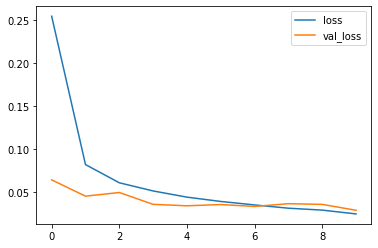

In [ ]:
#Train the model 2

batch_size=64
epochs=10

model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.10,callbacks=[plot_losses],verbose=0)

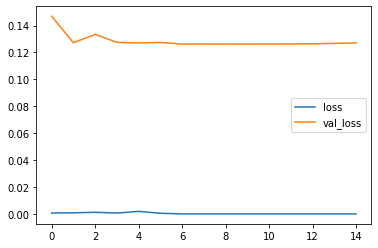

In [ ]:
#Train the model 1

batch_size=64
epochs=15

model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.10,callbacks=[plot_losses],verbose=0)

In [ ]:
score=model1.evaluate(x_test,y_test,verbose=0)
print("Test Loss :\t",score[0])
print("Test Accuracy :\t",score[1])

Test Loss :	 0.09232816100120544
Test Accuracy :	 0.9923999905586243


In [ ]:
score=model2.evaluate(x_test,y_test,verbose=0)
print("Test Loss :\t",score[0])
print("Test Accuracy :\t",score[1])

Test Loss :	 0.027231154963374138
Test Accuracy :	 0.9912999868392944


We got good results with **model 2**.
Let's go with model 2

In [ ]:
def create_model():
    # create model
    model=keras.Sequential(
    [
     keras.Input(shape=input_shape_of_image),
     layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     #layers.Conv2D(128,kernel_size=(3,3),activation="relu"),
     #layers.MaxPooling2D(pool_size=(2,2)),
     layers.Flatten(),
     layers.Dropout(0.3),
     layers.Dense(number_classes,activation="softmax"),
    ]
)
    return model

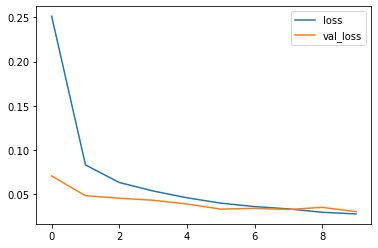

In [ ]:
# build the model
model = create_model()

# Fit the model

batch_size=64
epochs=10

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.10,callbacks=[plot_losses],verbose=0)

In [ ]:
model.save("model.h5")
print("model weights saved in model.h5 file")

model weights saved in model.h5 file


In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("model saved as model.json file")

model saved as model.json file


In [ ]:
!ls

gdrive	model.h5  model.json  sample_data


In [ ]:
from google.colab import files
files.download("model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>